In [ ]:
#connexion à ggdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#chargement des packages
import pandas as pd
import numpy as np

In [ ]:
#import du fichier via ggdrive
#Lien perso ggdrive
file_path="/content/drive/MyDrive/projet_python/df_dating.csv"
df=pd.read_csv(file_path,sep=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 69 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6804 non-null   int64  
 1   iid_pid     6804 non-null   float64
 2   iid         6804 non-null   float64
 3   id          6804 non-null   float64
 4   round       6804 non-null   float64
 5   order       6804 non-null   float64
 6   partner     6804 non-null   float64
 7   pid         6804 non-null   float64
 8   int_corr    6804 non-null   float64
 9   age_o       6804 non-null   float64
 10  pf_o_att    6804 non-null   float64
 11  pf_o_sin    6804 non-null   float64
 12  pf_o_int    6804 non-null   float64
 13  pf_o_fun    6804 non-null   float64
 14  pf_o_amb    6804 non-null   float64
 15  pf_o_sha    6804 non-null   float64
 16  attr_o      6804 non-null   float64
 17  sinc_o      6804 non-null   float64
 18  intel_o     6804 non-null   float64
 19  fun_o       6804 non-null  

## Vérification que la variable match est la variable cible

In [ ]:
#compte le nombre de valeurs pour chaque modalité de la variable match
df.match.value_counts()
#on peut voir que les modalités sont déséquilibrées : la fréquence de la modalité 1 est d'environ 0,168 %
#Ainsi dans lors de l'apprentissage, il faudra effectuer un tirage stratifié

0    5658
1    1146
Name: match, dtype: int64

In [ ]:
#compte le nombre de valeurs pour chaque modalité de la variable match
df.dec_o.value_counts()

0    3922
1    2882
Name: dec_o, dtype: int64

In [ ]:
#tableau de contingence
print(pd.crosstab(df['match'],df['dec_o']))

dec_o     0     1
match            
0      3922  1736
1         0  1146


In [ ]:
#Sélection des colonnes match et dec_o
df[['match','dec_o']]

,match,dec_o
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6799,1,1
6800,1,1
6801,1,1
6802,0,0


In [ ]:
#tri des colonnes match et dec_o ayant pour modalité 1
colonnes=['match','dec_o']
tri_match=df.loc[(df['match'] == 1) & (df['dec_o'] == 1),colonnes]
print(tri_match)

      match  dec_o
7         1      1
17        1      1
31        1      1
37        1      1
43        1      1
...     ...    ...
6790      1      1
6795      1      1
6799      1      1
6800      1      1
6801      1      1

[1146 rows x 2 columns]


In [ ]:
#tri des colonnes match avec la modalité 0 et dec_o avec la modalité 1
tri_match1=df.loc[(df['match'] == 0) & (df['dec_o'] == 1),colonnes]
print(tri_match1)

      match  dec_o
34        0      1
47        0      1
57        0      1
62        0      1
67        0      1
...     ...    ...
6786      0      1
6788      0      1
6789      0      1
6791      0      1
6798      0      1

[1736 rows x 2 columns]


In [ ]:
tri_match2=df.loc[(df['match'] == 1) & (df['dec_o'] == 0),colonnes]
print(tri_match2)

Empty DataFrame
Columns: [match, dec_o]
Index: []


## Statistiques descriptives

#Ages des candidats et des recruteurs

In [ ]:
#regrouper selon idd du candidat
#car il y a redondance des réponses par candidat selon les critères
df_candidat = df.groupby(['iid']).first()

In [ ]:
#regrouper selon pid du recruteur
#car il y a redondance des réponses par recruteur selon les critères
df_recruteur = df.groupby(['pid']).first()

In [ ]:
sex_candidat=df_candidat['gender'].value_counts()
print(sex_candidat)

1    227
0    225
Name: gender, dtype: int64


In [ ]:
sex_recruteur=df_recruteur['gender'].value_counts()
print(sex_recruteur)

1    235
0    227
Name: gender, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Répartition des hommes et des femmes chez les candidats')

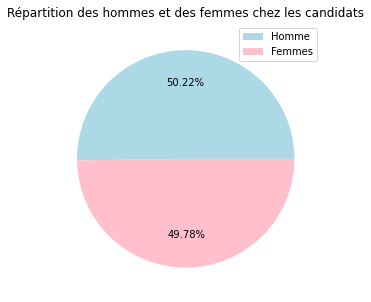

In [ ]:
plt.figure(figsize = (5, 5))
x = [sex_candidat[1], sex_candidat[0]]
plt.pie(x,colors=['lightblue','pink'],autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4)
plt.legend(['Homme','Femmes'])
plt.title('Répartition des hommes et des femmes chez les candidats')

Text(0.5, 1.0, 'Répartition des hommes et des femmes chez les recruteurs')

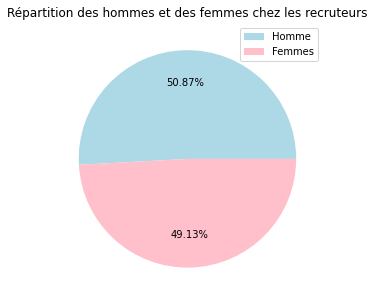

In [ ]:
plt.figure(figsize = (5, 5))
x = [sex_recruteur[1], sex_recruteur[0]]
plt.pie(x,colors=['lightblue','pink'],autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4)
plt.legend(['Homme','Femmes'])
plt.title('Répartition des hommes et des femmes chez les recruteurs')

#Pourcentage de réussite d'une rencontre pour un participant

In [ ]:
#Nombre de match par candidat
nb_match_candidat=df.groupby('iid').match.sum()
print(nb_match_candidat)
#Pourcentage de réussite d'une rencontre pour un candidat
(nb_match_candidat.value_counts()/453).sort_index(axis = 0, ascending = True)

iid
1.0      4
2.0      2
3.0      0
4.0      2
5.0      2
        ..
449.0    2
450.0    2
451.0    0
452.0    1
453.0    1
Name: match, Length: 452, dtype: int64


0     0.163355
1     0.231788
2     0.209713
3     0.125828
4     0.086093
5     0.075055
6     0.037528
7     0.019868
8     0.033113
9     0.006623
10    0.004415
11    0.004415
Name: match, dtype: float64

#Étude sur les vagues des rencontres



Text(0.5, 1.0, 'Nombre de rencontres par vague')

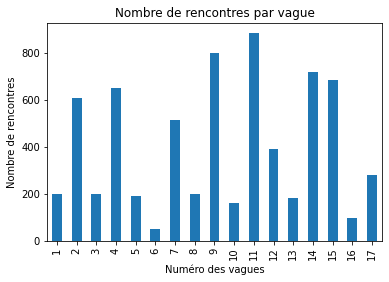

In [ ]:
#Nombre de rencontres par vague
nb_wave=df['wave'].value_counts()
nb_wave=nb_wave.sort_index(axis = 0, ascending = True)
nb_wave.plot.bar()
plt.xlabel('Numéro des vagues')
plt.ylabel('Nombre de rencontres')
plt.title('Nombre de rencontres par vague')

Text(0.5, 0, 'Numéro des vagues')

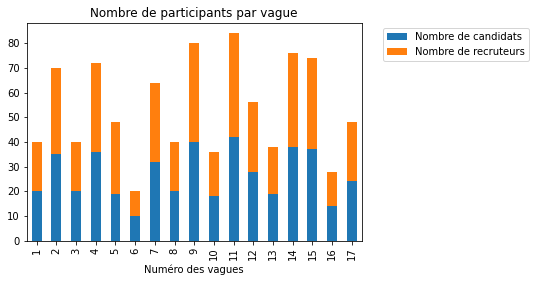

In [ ]:
#Nombre de participants par vague
nb_wave_candidat=df_candidat['wave'].value_counts()
nb_wave_recruteur=df_recruteur['wave'].value_counts()

#Création du dataframe correspondant au rencontres par vagues
df_wave_participant = pd.DataFrame({'Nombre de candidats': nb_wave_candidat,
                   'Nombre de recruteurs': nb_wave_recruteur})

#Bar plot des rencontres par vague
df_wave_participant.plot.bar(stacked=True,title="Nombre de participants par vague")
plt.legend(['Nombre de candidats', 'Nombre de recruteurs'],bbox_to_anchor = (1.05,1))
   
plt.xlabel('Numéro des vagues')

match    0    1
wave           
1      138   62
2      546   62
3      174   26
4      518  130
5      136   54
6       40   10
7      426   86
8      164   36
9      676  124
10     132   30
11     754  128
12     350   42
13     148   32
14     594  126
15     558  126
16      72   24
17     232   48


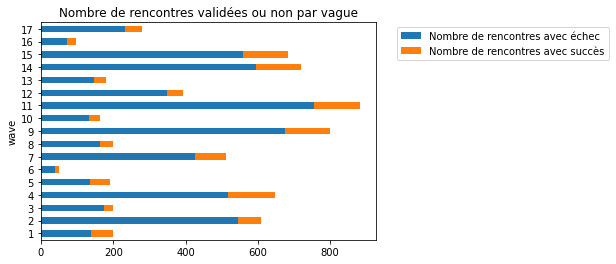

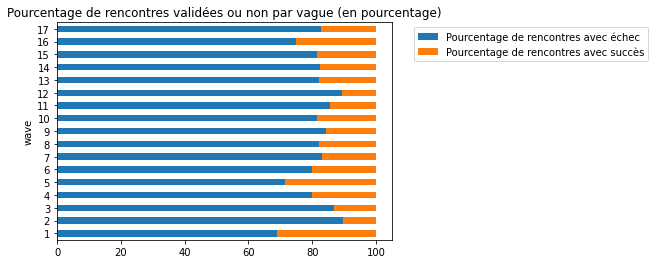

In [ ]:
#tableau croisé des matchs par vague
wave_match=pd.crosstab(df.wave, df.match)
print(wave_match)

#Création du dataframe correspondant au rencontres par vagues
df_wave = pd.DataFrame({'Nombre de rencontres avec échec': wave_match[0],
                   'Nombre de rencontre avec succès': wave_match[1]},
                  index=wave_match.index)
  
#Conversion des valeurs en pourcentage
percent_df_wave= df_wave.apply(lambda x: (x * 100) / sum(x), axis=1)

#Bar plot des rencontres par vague
df_wave.plot.barh(stacked=True,title="Nombre de rencontres validées ou non par vague")
plt.legend(['Nombre de rencontres avec échec', 'Nombre de rencontres avec succès'],bbox_to_anchor = (1.05,1))
           
#Bar plot en pourcentage
percent_df_wave.plot.barh(stacked=True,title="Pourcentage de rencontres validées ou non par vague (en pourcentage)")
plt.legend(['Pourcentage de rencontres avec échec', 'Pourcentage de rencontres avec succès'],bbox_to_anchor = (1.05,1))
 

#Étude sur les "go out"

2.0              163
1.0              145
3.0               99
4.0               23
5.0                9
Missing value      7
6.0                4
7.0                2
Name: go_out, dtype: int64


Text(0.5, 1.0, 'Répartition des "go out"')

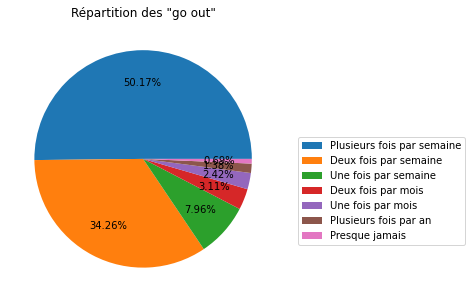

In [ ]:
autre_sortie=df_candidat['go_out'].value_counts()
print(autre_sortie)
plt.figure(figsize =(5, 5))
x = [autre_sortie[1],autre_sortie[2],autre_sortie[3],autre_sortie[4],autre_sortie[5],autre_sortie[6],autre_sortie[7]]
plt.pie(x,autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4)
#Ajout d'une légende à part
plt.legend(['Plusieurs fois par semaine', 'Deux fois par semaine', 'Une fois par semaine', 'Deux fois par mois', 'Une fois par mois', 'Plusieurs fois par an','Presque jamais'],bbox_to_anchor = (1.05, 0.6))
#Ajout d'un titre
plt.title('Répartition des "go out"')

match             0    1
go_out                  
1.0            1695  422
2.0            2119  413
3.0            1250  242
4.0             315   33
5.0             114   14
6.0              65    6
7.0              36    1
Missing value    64   15


([<matplotlib.axis.XTick at 0x7fac466424d0>,
 [Text(0, 0, 'Plusieurs fois par semaine'),
  Text(0, 0, 'Deux fois par semaine'),
  Text(0, 0, 'Une fois par semaine'),
  Text(0, 0, 'Deux fois par mois'),
  Text(0, 0, 'Une fois par mois'),
  Text(0, 0, 'Plusieurs fois par an'),
  Text(0, 0, 'Presque jamais')])

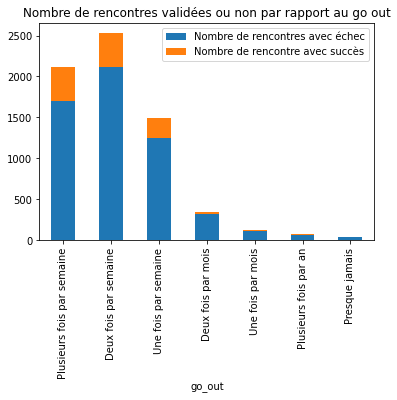

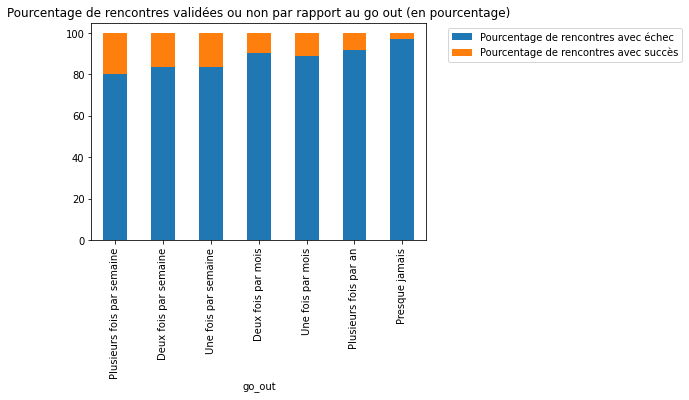

In [ ]:
#tableau croisé des matchs par go_out
go_out_match=pd.crosstab(df.go_out, df.match)
print(go_out_match)
#suppression des lignes avec missing value
go_out_match=go_out_match.drop('Missing value')

#Création du dataframe correspondant au rencontres par vagues
df_go_out = pd.DataFrame({'Nombre de rencontres avec échec': go_out_match[0],
                   'Nombre de rencontre avec succès': go_out_match[1]},
                  index=go_out_match.index)
  
#Conversion des valeurs en pourcentage
percent_df_go_out = df_go_out.apply(lambda x: (x * 100) / sum(x), axis=1)

#Bar plot des rencontres par vague
df_go_out.plot.bar(stacked=True,title="Nombre de rencontres validées ou non par rapport au go out")
plt.xticks(np.arange(7),['Plusieurs fois par semaine', 'Deux fois par semaine', 'Une fois par semaine', 'Deux fois par mois', 'Une fois par mois', 'Plusieurs fois par an','Presque jamais'], rotation=90)

#Bar plot en pourcentage
percent_df_go_out.plot.bar(stacked=True,title="Pourcentage de rencontres validées ou non par rapport au go out (en pourcentage)")
plt.legend(['Pourcentage de rencontres avec échec', 'Pourcentage de rencontres avec succès'],bbox_to_anchor = (1.05,1))
plt.xticks(np.arange(7),['Plusieurs fois par semaine', 'Deux fois par semaine', 'Une fois par semaine', 'Deux fois par mois', 'Une fois par mois', 'Plusieurs fois par an','Presque jamais'], rotation=90)


#Étude sur les activités et les secteurs

         yoga  sports  tvsports  exercise  dining  museums   art  hiking  \
6.00000    40    37.0      33.0      56.0    40.0     53.0  56.0    59.0   
6.61066     1     NaN       NaN       NaN     NaN      NaN   NaN     NaN   

         gaming  clubbing  reading    tv  theater  movies  concerts  music  
6.00000    41.0      64.0     48.0  68.0     54.0    32.0      68.0   44.0  
6.61066     NaN       NaN      NaN   NaN      NaN     NaN       NaN    NaN  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Text(0.5, 0, 'Indice attractivité : 2.0 (le moins prisé) à 10.0 (le plus prisé)')

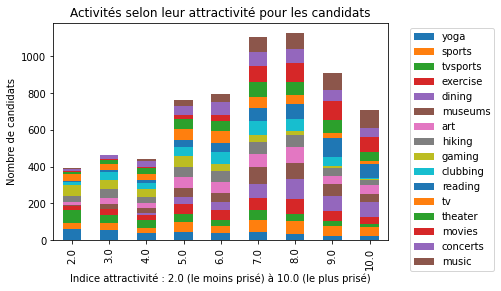

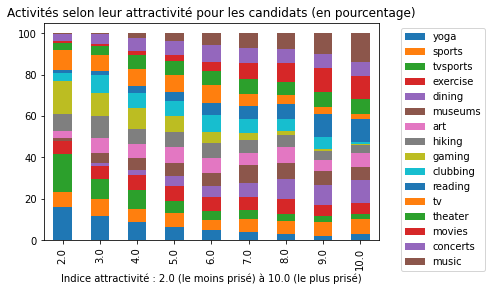

In [ ]:
#Ensemble des activités selon leur degré d'importance

#création du dataframe avec l'activité yoga
yoga=df_candidat['yoga'].value_counts()
new=pd.DataFrame(yoga)
#liste de l'ensemble des activités
activities=['yoga','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping']
#création du data frame par activités et notation selon l'activité 
for k in range(1,16) :
  new[activities[k]]=df_candidat[activities[k]].value_counts()
new=new.sort_index(axis = 0, ascending = True)
#nombre de fois où la note 10 (resp. la note 9) a été attribuée pour chaque activité
print(new.iloc[8:10])

#suppression des lignes avec NaN
index_with_nan=new.index[new.isnull().any(axis=1)]
new.drop(index_with_nan,0,inplace=True)

#Conversion des valeurs en pourcentage
percent_new = new.apply(lambda x: (x * 100) / sum(x), axis=1)

#diagramme en barre empilé pour l'ensemble des activités et les notations associées (NA non traitées)
new.plot(kind="bar", stacked=True)
plt.legend(activities,bbox_to_anchor = (1.05,1))
plt.title('Activités selon leur attractivité pour les candidats')
plt.xlabel('Indice attractivité : 2.0 (le moins prisé) à 10.0 (le plus prisé)')
plt.ylabel('Nombre de candidats')

#Bar plot en pourcentage
percent_new.plot.bar(stacked=True,title="Pourcentage de rencontres validées ou non par rapport au go out (en pourcentage)")
plt.legend(activities,bbox_to_anchor = (1.05,1))
plt.title('Activités selon leur attractivité pour les candidats (en pourcentage)')
plt.xlabel('Indice attractivité : 2.0 (le moins prisé) à 10.0 (le plus prisé)')

In [ ]:
#fonction
def my_func(x):
  return x/np.sum(x)
#profil ligne
activities_ligne=np.apply_along_axis(my_func,1,arr=new.values)

#Création de dataframe avec les intitulés des colonnes correspondant aux activités
df_activities_ligne=pd.DataFrame(activities_ligne,index=new.index,columns=new.columns)
print(df_activities_ligne.iloc[8:10])

#max pour les lignes 9 et 10
df_activities_ligne.idxmax(axis=1).iloc[8:10]

          yoga    sports  tvsports  exercise    dining   museums       art  \
10.0  0.029619  0.071932  0.022567  0.056417  0.110014  0.062059  0.070522   
9.0   0.022002  0.064906  0.028603  0.056106  0.093509  0.070407  0.050605   

        hiking    gaming  clubbing   reading        tv   theater    movies  \
10.0  0.038082  0.004231  0.009873  0.111425  0.023977  0.069111  0.114245   
9.0   0.045105  0.009901  0.057206  0.113311  0.030803  0.073707  0.116612   

      concerts     music  
10.0  0.067701  0.138223  
9.0   0.064906  0.102310  


10.0     music
9.0     movies
dtype: object

Les activités les plus prisées sont la musique et le cinéma

Environ 73 % des candidats concrétiseront moins de 3 rencontres



In [ ]:
#création du dataframe avec le secteur juridique
new_field=df_participant['field'].value_counts()
print(new_field)
new_field.idxmax(axis=0)

Law                                       31
MBA                                       31
Business                                  27
Social Work                               20
International Affairs                     14
                                          ..
Medical Informatics                        1
International Finance, Economic Policy     1
Law and Social Work                        1
International Development                  1
Law/Business                               1
Name: field, Length: 220, dtype: int64


'Law'

Les études les plus représentées sont celles des secteurs : Finance/économie/business

Les cinq suivantes sont :
Biological Sciences/Chemistry/Physics 
Law 
Social Science, Psychologist 
Political Science/International Affairs 
Education, Academia  